# Clustering Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
file_path = 'EastWestAirlines.csv'
df = pd.read_excel(file_path, sheet_name='data')

# Display the first few rows
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# Check for missing values
print(df.isnull().sum())


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [4]:
# Handle missing values (if any)
df = df.dropna()

In [5]:
#removing outliers using IQR method
def remove_outliers_iqr(df):
    # For each column, calculate the IQR and filter out the outliers
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:  # Only apply to numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter out outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_clean = remove_outliers_iqr(df)

# Display the first few rows of the cleaned dataset
df_clean.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


### Exploratory Data Analysis (EDA)

In [6]:

# Scaling the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, 1:])  # Assuming the first column is an ID column

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[1:])


            Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   2.842882e-17  6.574164e-17  1.705729e-16  3.038330e-16  1.350369e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
25%   -5.465676e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
50%   -3.027332e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
75%    1.866028e-01 -1.862987e-01  6.831212e-01 -9.824189e-02 -6.276658e-02   
max    1.618884e+01  1.422486e+01  2.135821e+00  1.344898e+01  2.042732e+01   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3.999000e+03  3.999000e+03        3999.000000     3.999000e+03   
mean  -2.842882e-17 -7.817925e-17           0.000000     1.776801e-17   
std    1.000125e+00  1.000125e+00           1.000125     1.000125e+00

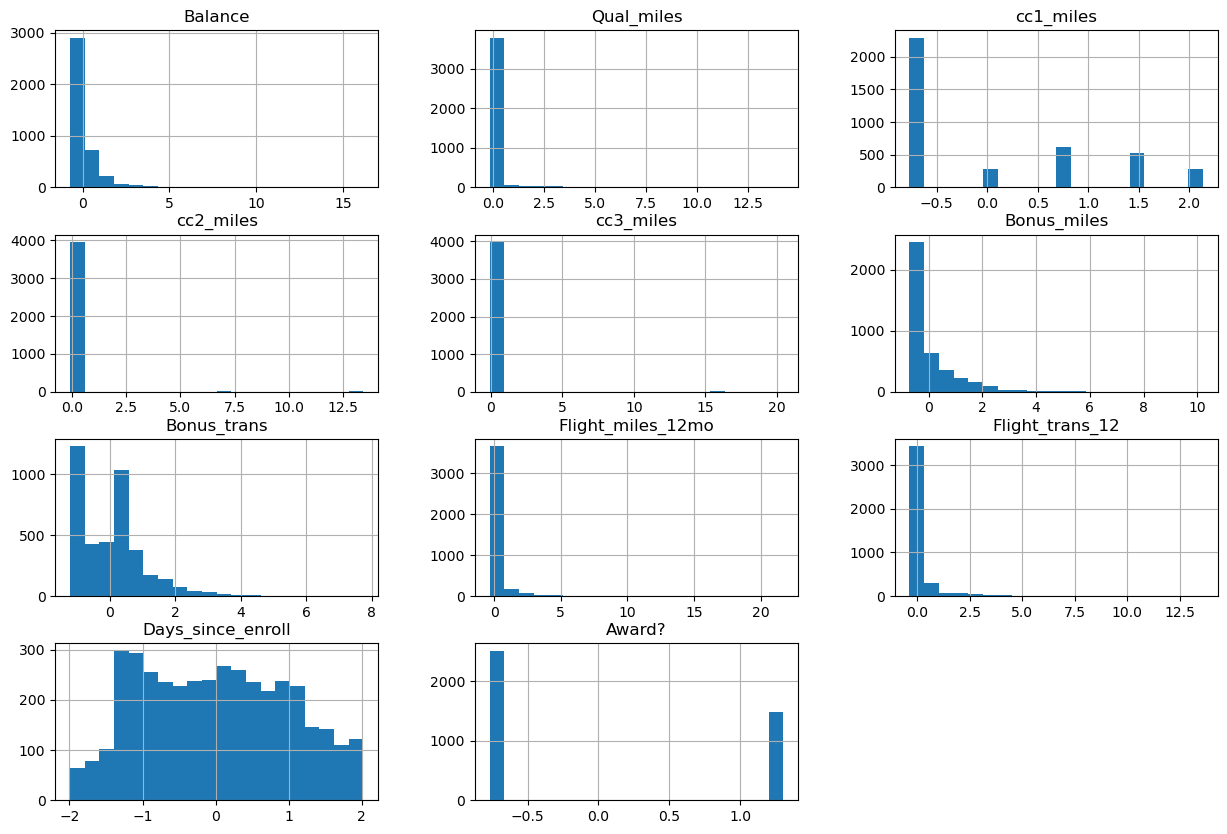

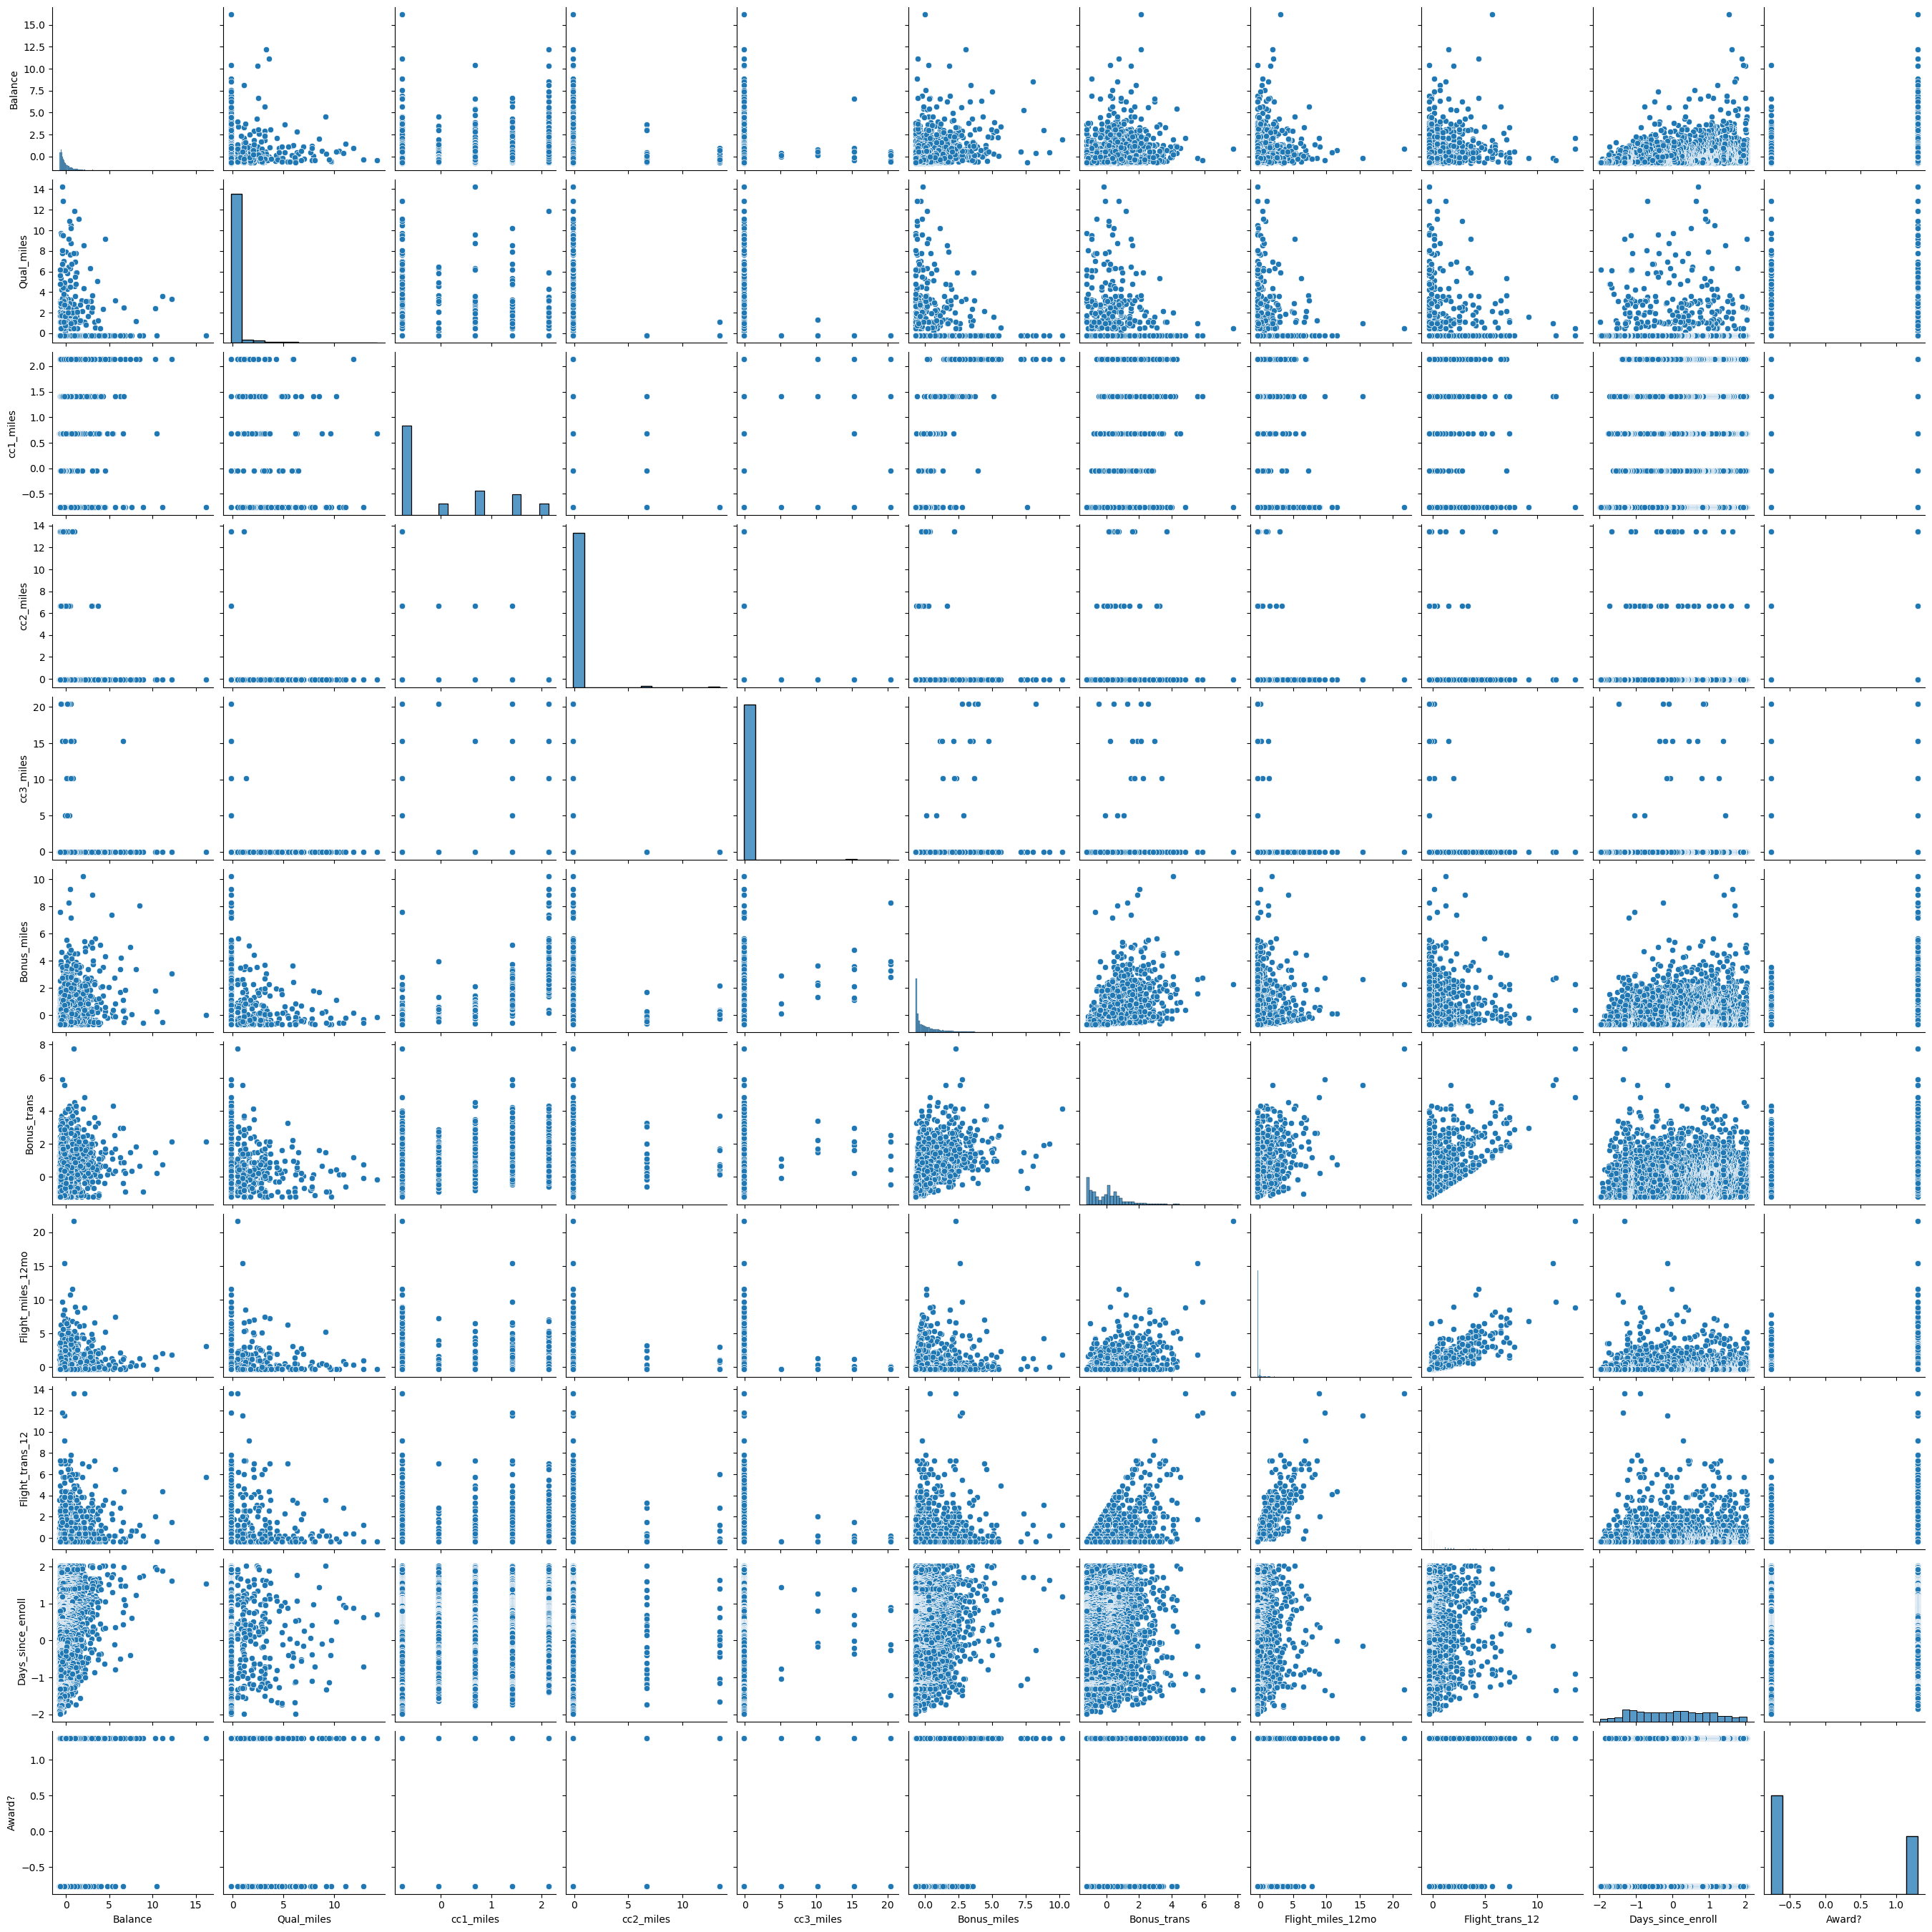

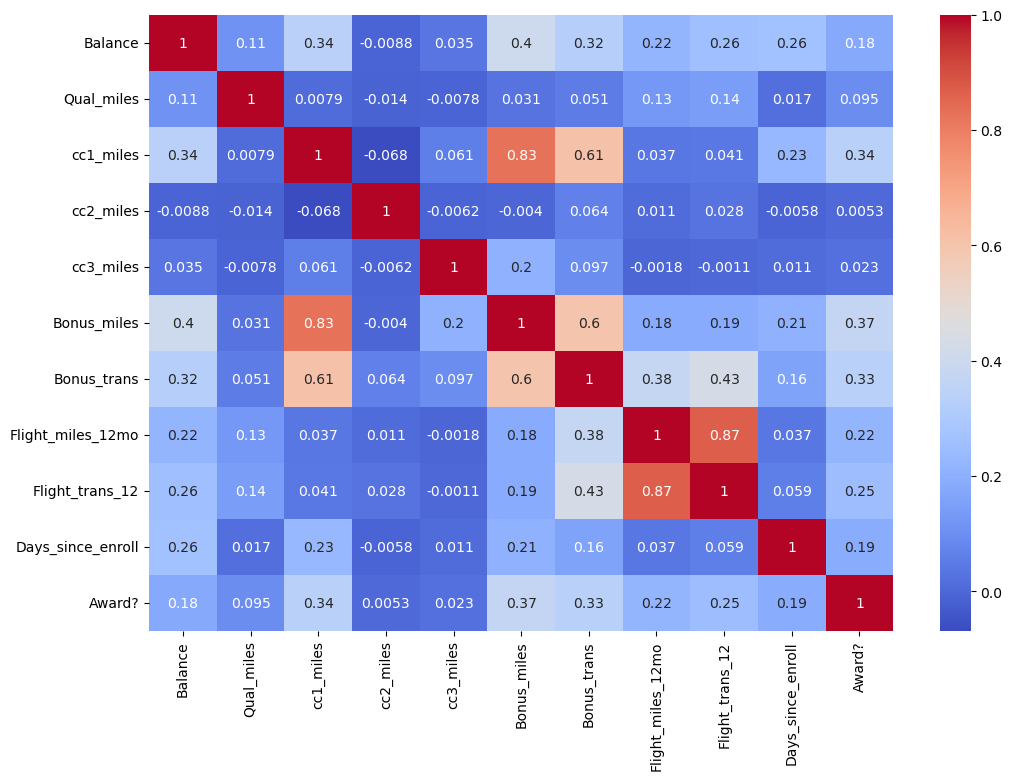

In [7]:
# Basic statistics
print(scaled_df.describe())

# Histograms
scaled_df.hist(bins=20, figsize=(15, 10))
plt.show()

# Pair plots
sns.pairplot(scaled_df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.show()


### Implementing Clustering Algorithms:


Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

#### K-Means Clustering

C:\Users\prana\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\prana\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


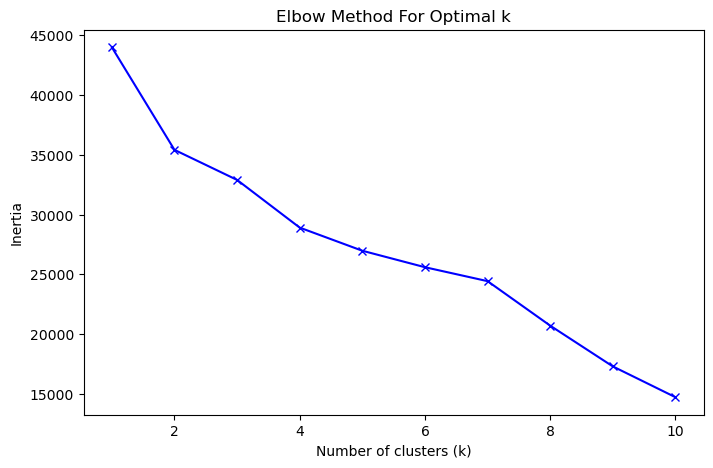

In [8]:
# Elbow method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
scaled_df['KMeans_Labels'] = kmeans_labels


#### Hierarchical Clustering

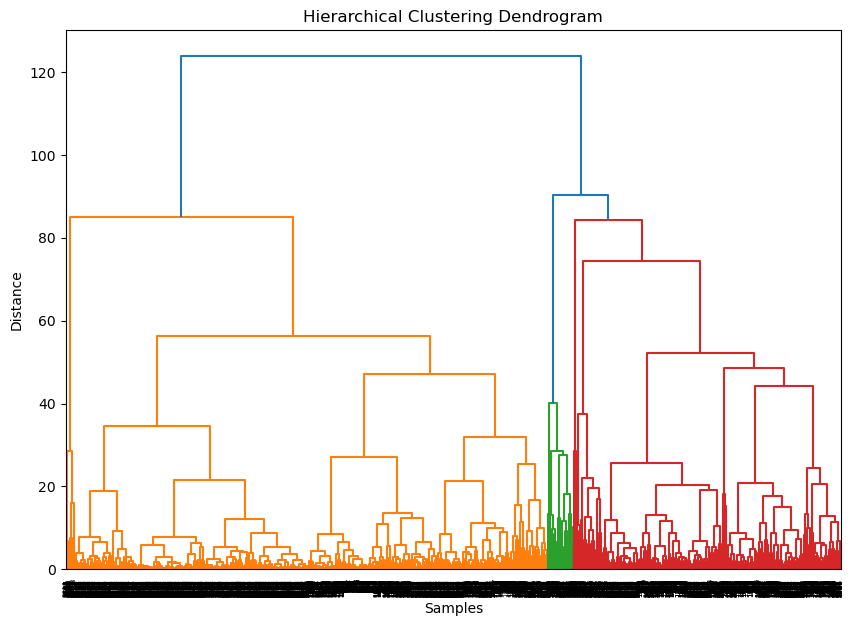

In [9]:
# Hierarchical clustering
Z = linkage(scaled_df.iloc[:, :-1], 'ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Fit hierarchical clustering with an appropriate number of clusters
hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')
scaled_df['Hierarchical_Labels'] = hierarchical_labels


#### DBSCAN Clustering

In [10]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df.iloc[:, :-2])
scaled_df['DBSCAN_Labels'] = dbscan_labels


### Cluster Analysis and Interpretation

In [11]:
# Analyze K-Means clusters
print(scaled_df.groupby('KMeans_Labels').mean())

# Analyze Hierarchical clusters
print(scaled_df.groupby('Hierarchical_Labels').mean())

# Analyze DBSCAN clusters
print(scaled_df.groupby('DBSCAN_Labels').mean())





                Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Labels                                                          
0             -0.055367    0.302155  -0.309430   0.057799  -0.062767   
1              0.731227   -0.022034   1.515824  -0.076202   0.203916   
2             -0.292797   -0.126410  -0.519361   0.007097  -0.060353   

               Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Labels                                                                 
0                -0.251199     0.038622           0.370110         0.390449   
1                 1.401791     0.982882           0.154157         0.180604   
2                -0.496021    -0.444440          -0.233548        -0.254192   

               Days_since_enroll    Award?  Hierarchical_Labels  DBSCAN_Labels  
KMeans_Labels                                                                   
0                       0.063669  1.186824             1.922513       1.258639  


### Visualization

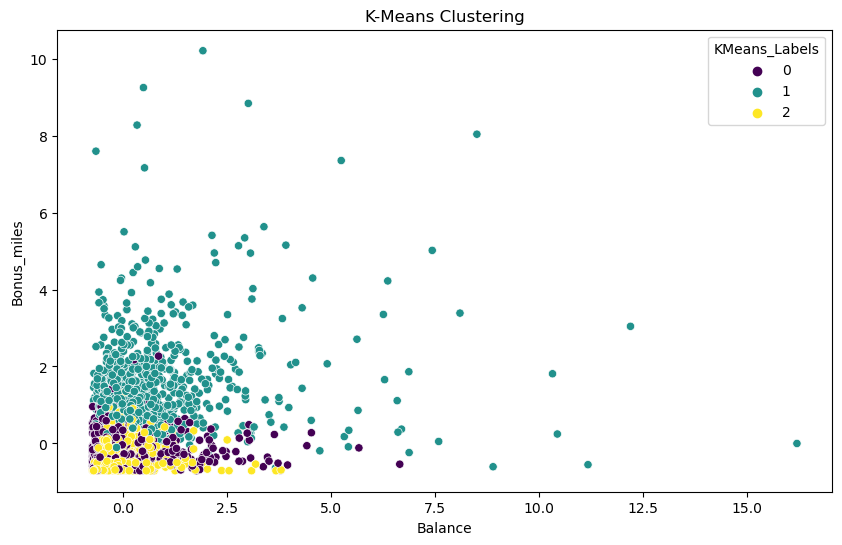

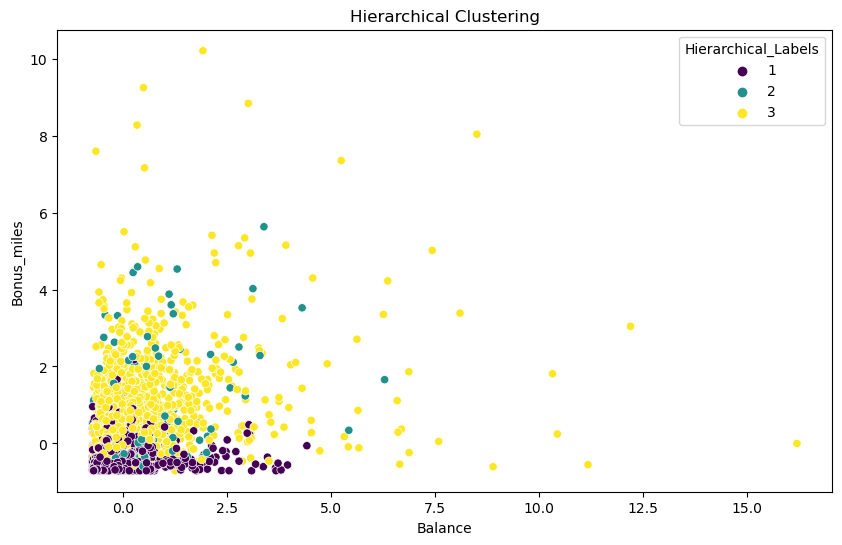

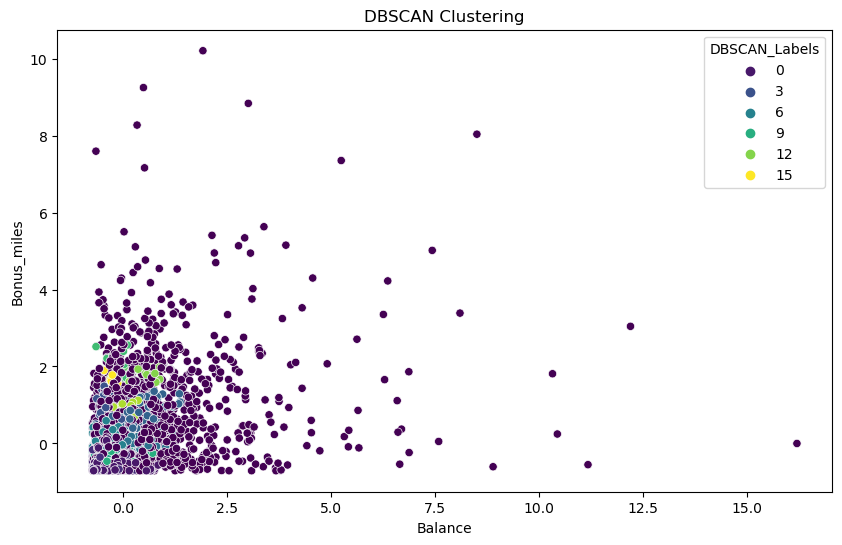

In [12]:
# Visualize K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='KMeans_Labels', data=scaled_df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Hierarchical_Labels', data=scaled_df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='DBSCAN_Labels', data=scaled_df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


## Evaluation and Performance Metrics

In [13]:
# Silhouette score for K-Means
silhouette_kmeans = silhouette_score(scaled_df.iloc[:, :-3], kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

# Silhouette score for DBSCAN (ignoring noise points with label -1)
dbscan_labels_filtered = scaled_df['DBSCAN_Labels'][scaled_df['DBSCAN_Labels'] != -1]
silhouette_dbscan = silhouette_score(scaled_df.iloc[:, :-3][scaled_df['DBSCAN_Labels'] != -1], dbscan_labels_filtered)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

# Hierarchical clustering silhouette score
silhouette_hierarchical = silhouette_score(scaled_df.iloc[:, :-3], hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')


Silhouette Score for K-Means: 0.2674062376813128
Silhouette Score for DBSCAN: 0.14397923390835202
Silhouette Score for Hierarchical Clustering: 0.2940432062008608
